In [13]:
import os
import cv2
import torch
import matplotlib.pyplot as plt

import detectron2.data.transforms as T
from detectron2.config import instantiate, LazyConfig
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.utils.visualizer import Visualizer, ColorMode

In [20]:
resize_aug = T.ResizeShortestEdge(short_edge_length=1024, max_size=1024)
img_path = "data/panels/ut_west_campus/ahg_3.jpg"
original_img = cv2.imread(img_path)
height, width = original_img.shape[:2]
img = resize_aug.get_transform(original_img).apply_image(original_img)
img_tensor = torch.as_tensor(img.astype("float32").transpose(2, 0, 1))
input = {
    "image": img_tensor,
    "height": height,
    "width": width,
    "img_path": img_path,
}

In [15]:
cfg = LazyConfig.load("configs/mask_rcnn_vit_base.py")
model = instantiate(cfg.model)
model.to("cuda")
model.eval()
DetectionCheckpointer(model).load(cfg.train.finetuned_weights);

In [21]:
outputs = model([input])

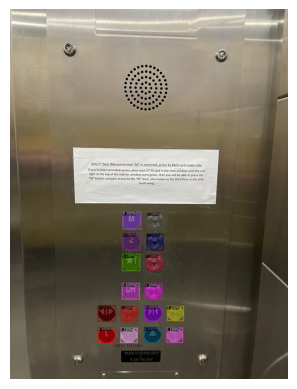

In [22]:
v = Visualizer(
    original_img[:, :, ::-1],
    scale=1.0,
    instance_mode=ColorMode.SEGMENTATION,
)
out = v.draw_instance_predictions(outputs[0]["instances"].to("cpu"))
plt.imshow(out.get_image())
plt.axis("off")
plt.show()